In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../../data/digit-recognizer/train.csv')
df_test = pd.read_csv('../../data/digit-recognizer/test.csv')

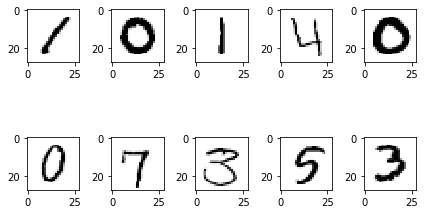

In [3]:
# 이미지 확인
figure = plt.figure()
ax_arr = []  # python list

img_data = df.drop('label', axis=1, inplace=False).values

for n in range(10):
    ax_arr.append(figure.add_subplot(2,5,n+1))
    ax_arr[n].imshow(img_data[n].reshape(28,28), 
                     cmap='Greys',            # 흑백이미지 표현
                     interpolation='nearest') # 보간법

plt.tight_layout()
plt.show()

In [4]:
train_x_data, test_x_data, train_t_data, test_t_data = train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=1, stratify=df['label'])

scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

ERROR! Session/line number was not unique in database. History logging moved to new session 385


In [5]:
## Tensorflow Implementation ##
sess = tf.Session()

onehot_train_t_data = sess.run(tf.one_hot(train_t_data, depth=10))
onehot_test_t_data = sess.run(tf.one_hot(test_t_data, depth=10))

# placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random.normal([784,10]))
b = tf.Variable(tf.random.normal([10]))

# Hypothesis, Model
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

# Loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                 labels=T))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-1).minimize(loss)

# session, 초기화
sess.run(tf.global_variables_initializer())

# 반복학습
num_of_epoch = 1000
batch_size = 100

for step in range(num_of_epoch):
    
    total_batch = int(norm_train_x_data.shape[0] / batch_size)

    for i in range(total_batch):
        batch_x = norm_train_x_data[i*batch_size:(i+1)*batch_size]
        batch_y = onehot_train_t_data[i*batch_size:(i+1)*batch_size]
        
        _, loss_val = sess.run([train, loss], feed_dict={X:batch_x,
                                                         T:batch_y})
    if step % 100 == 0:
        print('loss val : {}'.format(loss_val))

loss val : 1.1130518913269043
loss val : 0.24291673302650452
loss val : 0.20340701937675476
loss val : 0.1966889202594757
loss val : 0.1963789165019989
loss val : 0.19648805260658264
loss val : 0.1960849165916443
loss val : 0.1952027529478073
loss val : 0.194045290350914
loss val : 0.1928004026412964


In [6]:
predict = tf.argmax(H, 1)
correct = tf.equal(predict, tf.argmax(T, 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

accuracy_val = sess.run(accuracy, feed_dict={X: norm_test_x_data,
                                             T: onehot_test_t_data})

print('Accuracy : {}'.format(accuracy_val))

Accuracy : 0.9088095426559448


In [1]:
import tensorflow as tf

print(tf.__version__)

2.7.0


In [2]:
W = tf.random.normal([1], dtype=tf.float32)
print(W.numpy())

[1.078523]


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [2]:
df = pd.read_csv('../../data/digit-recognizer/train.csv')
df_test = pd.read_csv('../../data/digit-recognizer/test.csv')

In [3]:
train_x_data, test_x_data, train_t_data, test_t_data = train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=1, stratify=df['label'])

scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

In [11]:
model = Sequential()

model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))
model.add(Dense(units=10, activation='softmax'))

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# model compile
# 사용할 loss 함수를 지정, 사용한 optimizer(알고리즘)를 지정
from tensorflow.keras.optimizers import SGD

# loss
# linear regression : linear
# binary classification : binary_crossentropy
# multinomial classification : categorical_crossentropy(onehot encoding처리를 해야 해요!)
# multinomial classification : sparse_categorical_crossentropy(onehot처리가 필요 없어요!)

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 학습결과를 변수에 저장
history = model.fit(norm_train_x_data,
                    train_t_data,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
236/236 [==============================] - 2s 3ms/step - loss: 2.1891 - accuracy: 0.1960 - val_loss: 2.0723 - val_accuracy: 0.2823
Epoch 2/100
236/236 [==============================] - 1s 3ms/step - loss: 1.9784 - accuracy: 0.3730 - val_loss: 1.8805 - val_accuracy: 0.4731
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 1.8031 - accuracy: 0.5454 - val_loss: 1.7194 - val_accuracy: 0.6095
Epoch 4/100
236/236 [==============================] - 1s 3ms/step - loss: 1.6554 - accuracy: 0.6424 - val_loss: 1.5838 - val_accuracy: 0.6726
Epoch 5/100
236/236 [==============================] - 1s 3ms/step - loss: 1.5309 - accuracy: 0.6933 - val_loss: 1.4695 - val_accuracy: 0.7088
Epoch 6/100
236/236 [==============================] - 1s 3ms/step - loss: 1.4257 - accuracy: 0.7211 - val_loss: 1.3727 - val_accuracy: 0.7333
Epoch 7/100
236/236 [==============================] - 1s 3ms/step - loss: 1.3364 - accuracy: 0.7434 - val_loss: 1.2903 - val_accuracy: 0.7539

Epoch 58/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5436 - accuracy: 0.8683 - val_loss: 0.5423 - val_accuracy: 0.8687
Epoch 59/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5405 - accuracy: 0.8687 - val_loss: 0.5393 - val_accuracy: 0.8689
Epoch 60/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5375 - accuracy: 0.8693 - val_loss: 0.5365 - val_accuracy: 0.8694
Epoch 61/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5346 - accuracy: 0.8696 - val_loss: 0.5337 - val_accuracy: 0.8697
Epoch 62/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.8700 - val_loss: 0.5310 - val_accuracy: 0.8706
Epoch 63/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5290 - accuracy: 0.8703 - val_loss: 0.5284 - val_accuracy: 0.8711
Epoch 64/100
236/236 [==============================] - 1s 3ms/step - loss: 0.5263 - accuracy: 0.8707 - val_loss: 0.5258 - val_accuracy:

In [14]:
print(model.evaluate(norm_test_x_data, test_t_data))
#        loss               accuracy
# [0.4799305200576782, 0.876031756401062]

394/394 [==============================] - 1s 2ms/step - loss: 0.4751 - accuracy: 0.8766
[0.47507286071777344, 0.8765873312950134]


In [23]:
# 모델 저장
# 학습한 후 모델이 메모리에 저장. 프로그램 종료하면 학습한 모델이 사라짐
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

train_x_data, test_x_data, train_t_data, test_t_data = train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=1, stratify=df['label'])

scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

model = Sequential()

model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))
model.add(Dense(units=10, activation='softmax'))

print(model.summary())

# loss
# linear regression : linear
# binary classification : binary_crossentropy
# multinomial classification : categorical_crossentropy(onehot encoding처리를 해야 해요!)
# multinomial classification : sparse_categorical_crossentropy(onehot처리가 필요 없어요!)

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 저장. model 구조 뺴고 checkpoint기능을 이용해서 weight, bias만 저장
checkpoint_path = '../../training_ckpt/cp.ckpt'
# checkpoint_dir = os.path.dirname(checkpoint_path) # 실제 경로로 만들어 준다
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

# 학습결과를 변수에 저장
history = model.fit(norm_train_x_data,
                    train_t_data,
                    epochs=100,
                    batch_size=100,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=[cp_callback])

print(model.evaluate(norm_test_x_data, test_t_data))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
236/236 [==============================] - ETA: 0s - loss: 2.2652 - accuracy: 0.1507
Epoch 00001: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 2.2652 - accuracy: 0.1507 - val_loss: 2.1471 - val_accuracy: 0.2236
Epoch 2/100
232/236 [============================>.] - ETA: 0s - loss: 2.0410 - accuracy: 0.3056
Epoch 00002: saving model to ../../training_ckpt\cp.ckpt
236

216/236 [==========================>...] - ETA: 0s - loss: 0.7350 - accuracy: 0.8386
Epoch 00027: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.7338 - accuracy: 0.8390 - val_loss: 0.7298 - val_accuracy: 0.8422
Epoch 28/100
232/236 [============================>.] - ETA: 0s - loss: 0.7236 - accuracy: 0.8401 ETA: 0s - loss: 0.7283 - accuracy: 
Epoch 00028: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 4ms/step - loss: 0.7226 - accuracy: 0.8403 - val_loss: 0.7190 - val_accuracy: 0.8429
Epoch 29/100
234/236 [============================>.] - ETA: 0s - loss: 0.7121 - accuracy: 0.8420
Epoch 00029: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.7121 - accuracy: 0.8420 - val_loss: 0.7089 - val_accuracy: 0.8432
Epoch 30/100
223/236 [===========================>..] - ETA: 0s - loss: 0.7009 - accuracy: 0.8439
Epoch 00030: saving m

Epoch 56/100
223/236 [===========================>..] - ETA: 0s - loss: 0.5539 - accuracy: 0.8665
Epoch 00056: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.5548 - accuracy: 0.8663 - val_loss: 0.5572 - val_accuracy: 0.8650
Epoch 57/100
221/236 [===========================>..] - ETA: 0s - loss: 0.5508 - accuracy: 0.8671
Epoch 00057: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.5515 - accuracy: 0.8670 - val_loss: 0.5540 - val_accuracy: 0.8653
Epoch 58/100
219/236 [==========================>...] - ETA: 0s - loss: 0.5486 - accuracy: 0.8674
Epoch 00058: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.5482 - accuracy: 0.8673 - val_loss: 0.5509 - val_accuracy: 0.8655
Epoch 59/100
222/236 [===========================>..] - ETA: 0s - loss: 0.5454 - accuracy: 0.8680
Epoch 00059: saving model to ../../training_

Epoch 85/100
217/236 [==========================>...] - ETA: 0s - loss: 0.4846 - accuracy: 0.8777
Epoch 00085: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.4856 - accuracy: 0.8776 - val_loss: 0.4907 - val_accuracy: 0.8735
Epoch 86/100
234/236 [============================>.] - ETA: 0s - loss: 0.4839 - accuracy: 0.8780
Epoch 00086: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.4839 - accuracy: 0.8779 - val_loss: 0.4891 - val_accuracy: 0.8738
Epoch 87/100
219/236 [==========================>...] - ETA: 0s - loss: 0.4829 - accuracy: 0.8783
Epoch 00087: saving model to ../../training_ckpt\cp.ckpt
236/236 [==============================] - 1s 3ms/step - loss: 0.4823 - accuracy: 0.8784 - val_loss: 0.4875 - val_accuracy: 0.8741
Epoch 88/100
236/236 [==============================] - ETA: 0s - loss: 0.4807 - accuracy: 0.8786
Epoch 00088: saving model to ../../training_

In [24]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint

df = pd.read_csv('../../data/digit-recognizer/train.csv')
df_test = pd.read_csv('../../data/digit-recognizer/test.csv')

train_x_data, test_x_data, train_t_data, test_t_data = train_test_split(df.drop('label', axis=1, inplace=False), df['label'], test_size=0.3, random_state=1, stratify=df['label'])

scaler = MinMaxScaler()
scaler.fit(train_x_data)

norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

model = Sequential()

model.add(Flatten(input_shape=(norm_train_x_data.shape[1],)))
model.add(Dense(units=10, activation='softmax'))

print(model.summary())

# loss
# linear regression : linear
# binary classification : binary_crossentropy
# multinomial classification : categorical_crossentropy(onehot encoding처리를 해야 해요!)
# multinomial classification : sparse_categorical_crossentropy(onehot처리가 필요 없어요!)

model.compile(optimizer=SGD(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.evaluate(norm_test_x_data, test_t_data))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None
394/394 [==============================] - 1s 2ms/step - loss: 2.3538 - accuracy: 0.1023
[2.3537538051605225, 0.10230159014463425]


In [29]:
checkpoint_path = '../../training_ckpt/cp.ckpt'
model.load_weights(checkpoint_path)

print(model.evaluate(norm_test_x_data, test_t_data))

394/394 [==============================] - 1s 3ms/step - loss: 0.4796 - accuracy: 0.8772
[0.47957196831703186, 0.8772222399711609]


In [17]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1134732315874370091
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4158062592
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4729692591723486489
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [19]:
import tensorflow as tf
import numpy as np



# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 넘파이 데이터를 텐서 데이터로 변환
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_train = tf.one_hot(y_train, depth=len(np.unique(y_train)))
y_test = tf.one_hot(y_test, depth=len(np.unique(y_train)))

# 레이어 설계
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(), metrics=['accuracy'])

# CPU 학습
print("CPU를 사용한 학습")
with tf.device("/device:CPU:0"):
    model.fit(x_train, y_train, batch_size=32, epochs=3)

print("GPU를 사용한 학습")
with tf.device("/device:GPU:0"):
    model.fit(x_train, y_train, batch_size=32, epochs=3)

11501568/11490434 [==============================] - 0s 0us/step
CPU를 사용한 학습
Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 717.4432 - accuracy: 0.1119
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3013 - accuracy: 0.1124
GPU를 사용한 학습
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124
